**Linear Regression**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('HousingData.csv')

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
data.CRIM.fillna(value=3.611874, inplace = True)
data.ZN.fillna(value=11.211934, inplace=True)
data.INDUS.fillna(value=11.083992	, inplace=True)
data.CHAS.fillna(value=0.069959		, inplace=True)
data.AGE.fillna(value=68.518519		, inplace=True)
data.LSTAT.fillna(value=12.715432, inplace=True)


In [ ]:
from scipy import stats
zscore=np.abs(stats.zscore(data))
zscore

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.422328,0.296443,1.311010,0.279851,0.144217,0.413672,1.210593e-01,0.140214,0.982843,0.666608,1.459000,0.441052,1.104146e+00,0.159686
1,0.419870,0.489639,0.599771,0.279851,0.740262,0.194274,3.787156e-01,0.557160,0.867883,0.987329,0.303094,0.441052,5.103527e-01,0.101524
2,0.419872,0.489639,0.599771,0.279851,0.740262,1.282714,2.706270e-01,0.557160,0.867883,0.987329,0.303094,0.396427,1.239748e+00,1.324247
3,0.419277,0.489639,1.330435,0.279851,0.835284,1.016303,8.287698e-01,1.077737,0.752922,1.106115,0.113032,0.416163,1.395333e+00,1.182758
4,0.414981,0.489639,1.330435,0.279851,0.835284,1.228577,5.223385e-01,1.077737,0.752922,1.106115,0.113032,0.441052,1.354044e-08,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.415733,0.489639,0.126411,0.279851,0.158124,0.439316,2.121240e-02,0.625796,0.982843,0.803212,1.176466,0.387217,1.354044e-08,0.014454
502,0.417766,0.489639,0.126411,0.279851,0.158124,0.234548,2.984598e-01,0.716639,0.982843,0.803212,1.176466,0.441052,5.189170e-01,0.210362
503,0.415952,0.489639,0.126411,0.279851,0.158124,0.984960,8.201227e-01,0.773684,0.982843,0.803212,1.176466,0.441052,1.009938e+00,0.148802
504,0.410232,0.489639,0.126411,0.279851,0.158124,0.725672,7.581068e-01,0.668437,0.982843,0.803212,1.176466,0.403225,8.900378e-01,0.057989


In [ ]:
data_1=data[(zscore<3).all(axis=1)]
print("Dimension after removing outliers",data_1.shape)

Dimension after removing outliers (403, 14)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data_1.iloc[:,:-1]
y = data_1.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Standardizing the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scalar=StandardScaler()

In [ ]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test);

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
regression = LinearRegression()
regression.fit(X_train,y_train);

In [ ]:
mse = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv = 5)
np.mean(mse)

-17.889616820799596

Prediction

In [ ]:
reg_predict = regression.predict(X_test)

In [ ]:
import seaborn as sns

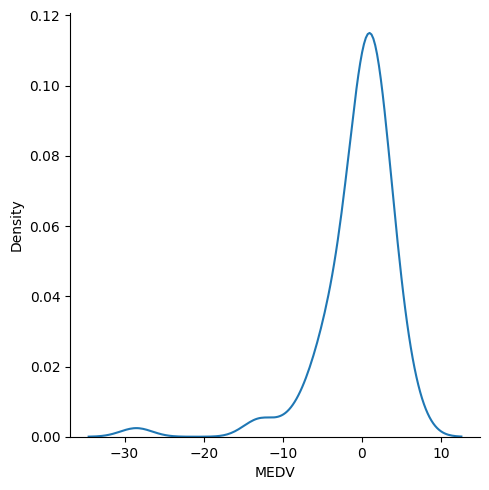

In [ ]:
sns.displot(reg_predict-y_test,kind='kde')

In [ ]:
df2=pd.DataFrame({"Actual_value":y_test,"Predicted_value":reg_predict,"Difference":y_test-reg_predict})
df2

,Actual_value,Predicted_value,Difference
75,21.4,24.061272,-2.661272
335,21.1,21.921436,-0.821436
337,18.5,19.762926,-1.262926
33,13.1,14.263022,-1.163022
42,25.3,26.677408,-1.377408
...,...,...,...
45,19.3,22.295527,-2.995527
95,28.4,28.684412,-0.284412
302,26.4,28.101773,-1.701773
428,11.0,16.092506,-5.092506


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
print("MAE is: ",mean_absolute_error(y_test,reg_predict))
print("MAPE is: ",mean_absolute_percentage_error(y_test,reg_predict))
print("MSE is :", mean_squared_error(y_test,reg_predict))
print("R2 SCORE is: ",r2_score(y_test,reg_predict))

MAE is:  2.972702238417658
MAPE is:  0.13914272078425907
MSE is : 23.29993209951478
R2 SCORE is:  0.6352858339031344
